In [19]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

## Smoothing via running-mean filter

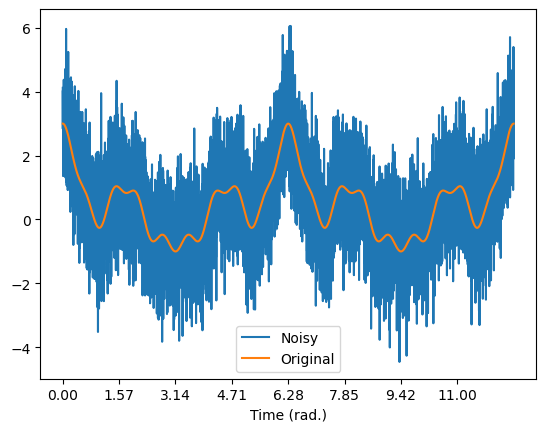

In [3]:
# create a noisy signal

N = 10001
time = np.linspace(0,4*np.pi,N)

signal = np.zeros(N)
for i in range(1,4):
  signal += np.cos(i*time)**i

noisysignal = signal + np.random.randn(N)

plt.plot(time,noisysignal, time,signal)
plt.legend(['Noisy','Original'])
plt.xlabel('Time (rad.)')
plt.xticks(np.arange(time[0],time[-1],np.pi/2))
plt.show()

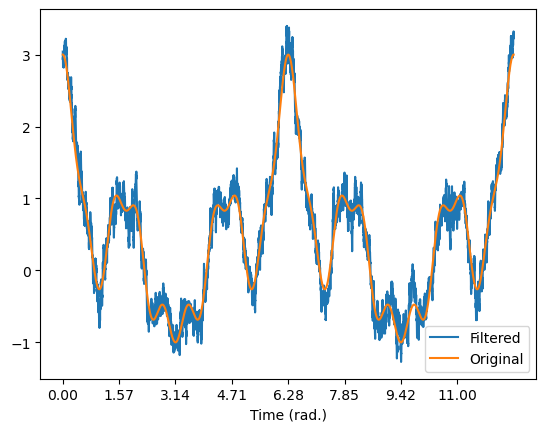

In [4]:
k = 15

filtsignal = copy.deepcopy(noisysignal)

for i in range(N):
  lowbnd = np.max((0,i-k))
  uppbnd = np.min((N,i+k))

  filtsignal[i] = np.mean(noisysignal[lowbnd:uppbnd])


# plot
plt.plot(time,filtsignal, time,signal)
plt.legend(['Filtered','Original'])
plt.xlabel('Time (rad.)')
plt.xticks(np.arange(time[0],time[-1],np.pi/2))
plt.show()

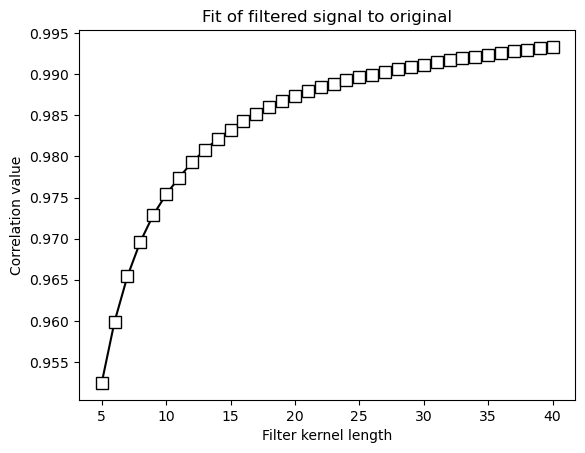

In [5]:
# mean-smoothing function
def meansmooth(signalIn,k):
  filtsignal = copy.deepcopy(signalIn)
  for i in range(N):
    filtsignal[i] = np.mean(signalIn[ np.max((0,i-k)) : np.min((N,i+k)) ])
  return filtsignal


# range of smoothing kernels
kvals = np.arange(5,41) # 500,15
signalCorrs = []

for ki in kvals:
  # filter the signal
  newsignal = meansmooth(noisysignal,ki)
  ctmp = np.corrcoef(newsignal,signal)
  signalCorrs.append(ctmp[0,1])
  

# plotting
plt.plot(kvals,signalCorrs,'ks-',markerfacecolor='w',markersize=8)
plt.title('Fit of filtered signal to original')
plt.xlabel('Filter kernel length')
plt.ylabel('Correlation value')
plt.show()

### Despeckling via median filter

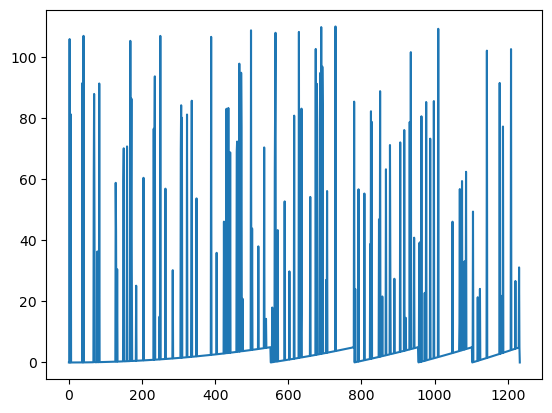

In [6]:
# create the data

pnts = 1234
signal = np.mod(np.linspace(0,5,pnts)**2,5)

# add spike noise
p = int(.1*len(signal))
spiketimes = np.random.randint(0,len(signal),p)

signal[spiketimes] = 10 + 100*np.random.rand(p)

plt.plot(signal)
plt.show()

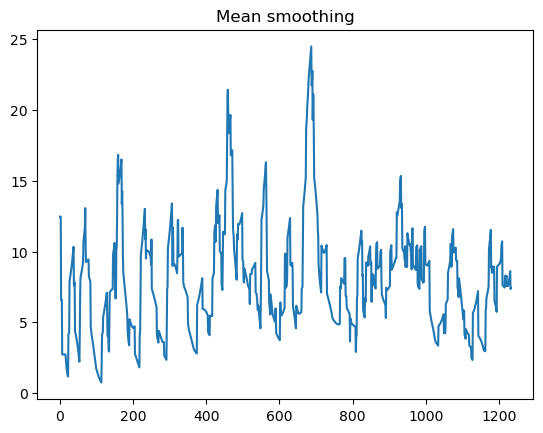

In [7]:
# try mean-smoothing
k = 15

for i in range(pnts):
  lowbnd = np.max((0,i-k))
  uppbnd = np.min((pnts,i+k))
  signal[i] = np.mean(signal[lowbnd:uppbnd])

# and plot
plt.plot(signal)
plt.title('Mean smoothing')
plt.show()

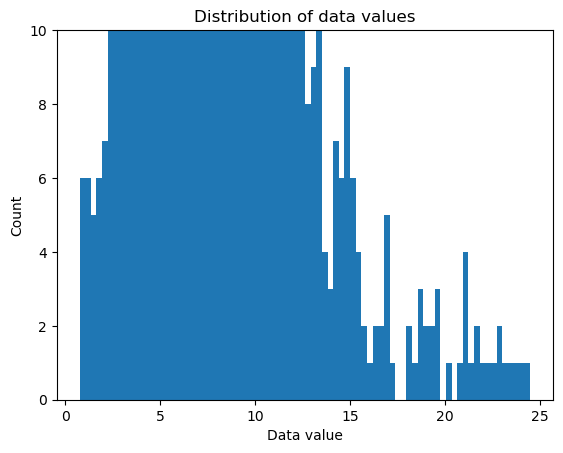

In [8]:
# find a threshold for unusually large values

plt.hist(signal,80)
plt.ylim([0,10])
plt.xlabel('Data value')
plt.ylabel('Count')
plt.title('Distribution of data values')
plt.show()

In [9]:
# threshold
thresh = 10

# find all data points above threshold
suprathreshpoints = np.where(signal>thresh)[0]
print(suprathreshpoints)
print(100*len(suprathreshpoints)/pnts)

[   0    1    2   36   37   64   65   66   67   68   69   70  147  148
  149  154  155  156  157  158  159  160  161  162  163  164  165  166
  167  168  169  170  171  223  224  225  226  227  228  229  230  231
  232  233  234  236  237  238  239  240  241  242  250  295  296  297
  298  299  300  301  302  303  304  305  306  307  309  322  323  335
  336  422  423  424  425  426  427  428  429  430  431  432  433  434
  435  436  437  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  470
  471  472  473  474  475  476  484  485  486  487  488  489  490  491
  492  493  494  495  496  497  498  551  552  553  554  555  556  557
  558  559  560  561  562  563  564  565  622  623  624  625  626  627
  628  629  664  665  666  667  668  669  670  671  672  673  674  675
  676  677  678  679  680  681  682  683  684  685  686  687  688  689
  690  691  692  693  694  695  696  697  698  699  700  701  702  703
  704 

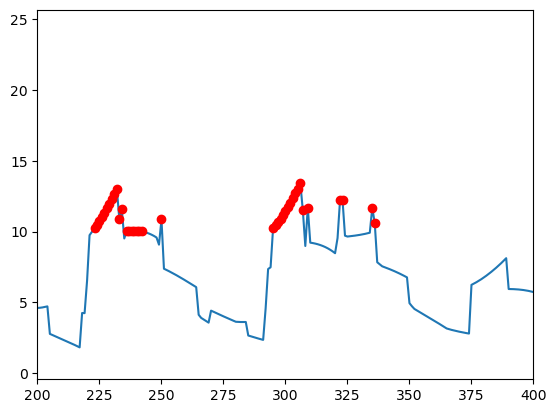

In [10]:
plt.plot(signal)
plt.plot(suprathreshpoints,signal[suprathreshpoints],'ro')

# zoom in
plt.xlim([200,400])
plt.show()

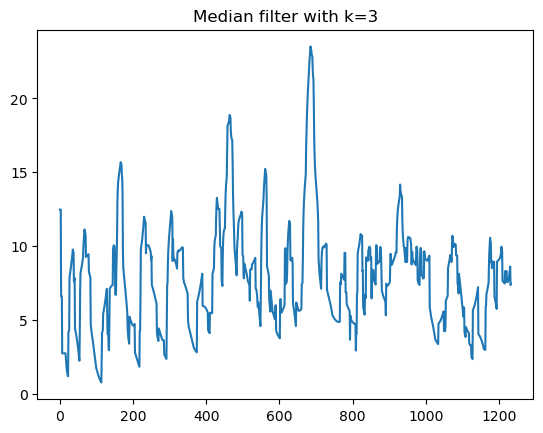

In [11]:
# apply median filter

k = 3

for i in suprathreshpoints:
  lowbnd = np.max((0,i-k))
  uppbnd = np.min((pnts,i+k))
  signal[i] = np.median(signal[lowbnd:uppbnd])

plt.plot(signal)
plt.title('Median filter with k=' + str(k))
plt.show()

### Denoising biomedical data

In [12]:
# import data
import pandas as pd
df = pd.read_csv('EKG_signals.csv',sep=',',names=['noisy','orig'])
df

,noisy,orig
0,920.23,963
1,929.06,987
2,1116.60,1024
3,1073.60,1073
4,1070.60,1134
...,...,...
995,953.24,1020
996,913.34,1020
997,961.08,1025
998,953.80,1030


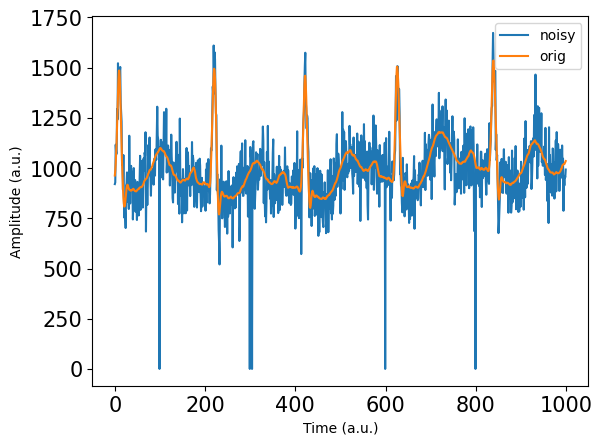

In [13]:
# plot the data
df.plot(fontsize=15)#,marker='o',linewidth=.1)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

In [14]:
# copy the noisy version
df['filtered'] = df['noisy'].copy()
print(df)

       noisy  orig  filtered
0     920.23   963    920.23
1     929.06   987    929.06
2    1116.60  1024   1116.60
3    1073.60  1073   1073.60
4    1070.60  1134   1070.60
..       ...   ...       ...
995   953.24  1020    953.24
996   913.34  1020    913.34
997   961.08  1025    961.08
998   953.80  1030    953.80
999   992.79  1035    992.79

[1000 rows x 3 columns]


In [ ]:
# median filter for low values

# threshold
thresh = 300

# find all data points above threshold
suprathreshpoints = np.where(df['noisy']<thresh)[0]

# apply median filter
k = 7
for i in suprathreshpoints:
  lowbnd = np.max((0,i-k))
  uppbnd = np.min((len(df),i+k))
  df['filtered'][i] = np.median(df['noisy'][lowbnd:uppbnd])

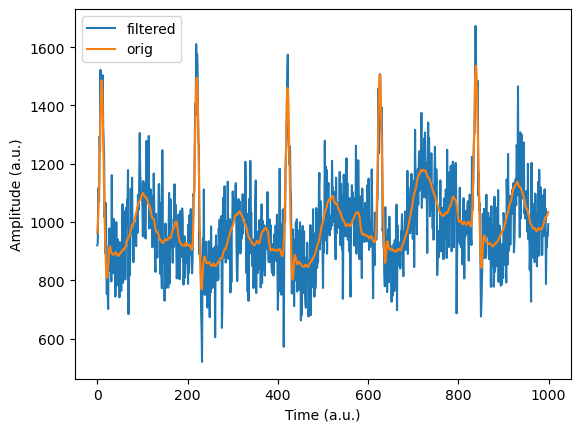

In [16]:
# plot the data
df[['filtered','orig']].plot()
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

In [ ]:
# now for a mean-smoothing filter
k = 5

for i in range(len(df)):
  lowbnd = np.max((0,i-k))
  uppbnd = np.min((len(df),i+k))
  df['filtered'][i] = np.mean(df['noisy'][lowbnd:uppbnd])

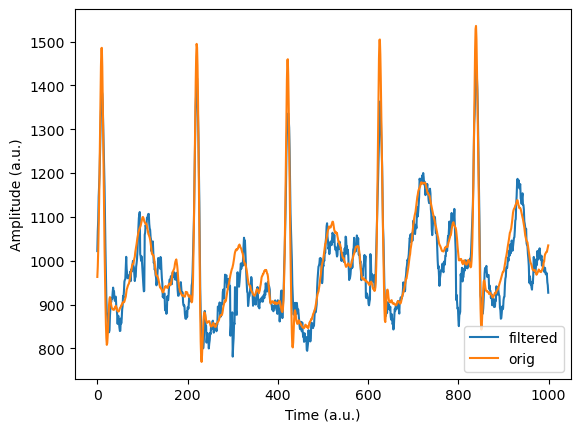

In [18]:
# plot the data
df[['filtered','orig']].plot()
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude (a.u.)')
plt.show()